In [293]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3

In [571]:
import json
#data_dir = "../data/N-64_delay/rc-1_"
data_dir = "../data/random_test/"
time = np.load(data_dir + "time.npy")
target = np.load(data_dir + "target.npy")
inputs = np.load(data_dir + "input.npy")
output = np.load(data_dir + "output.npy")
weight = np.load(data_dir + "weight.npy")
cwnd = np.load(data_dir + "cwnd.npy")
cwnd_peak = np.load(data_dir + "cwnd_peak.npy")
settings = json.load(open(data_dir + "settings.json"))
settings

{u'N': 128,
 u'duration': 300,
 u'esn_dt': 0.1,
 u'init_time': 10.0,
 u'input_num': 1,
 u'link_bps': u'10Mb',
 u'link_delay': u'10ms',
 u'link_queue': u'10',
 u'reg_coefficient': 0.01,
 u'training_time': 210.0}

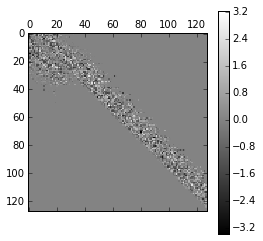

In [572]:
weight_matrix = np.zeros((settings['N'],settings['N']))
for i, w in enumerate(weight):
    src = i / (settings['N']-1)
    dst = i % (settings['N']-1)
    if src<=dst:
        dst +=1
    #weight_matrix[src][dst] = np.abs(w)
    weight_matrix[src][dst] = w

plt.figure(figsize=(30, 20))
plt.matshow(weight_matrix,cmap=plt.cm.gray)
plt.colorbar()
plt.show()

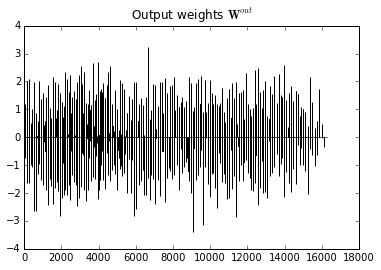

In [573]:
plt.figure(figsize = (9, 6))

plt.figure(0).clear()
plt.bar(range(weight.shape[0]), weight)
plt.title('Output weights $\mathbf{W}^{out}$')

#mpld3.display()
plt.show()

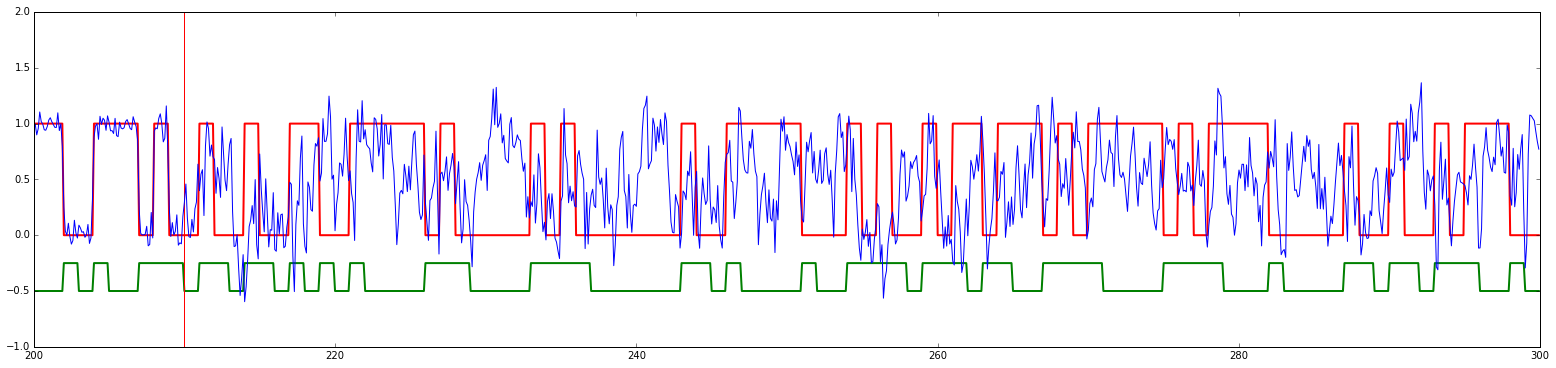

In [574]:
plt.figure(figsize=(27, 6))


plt.plot(time, target, 'r', linewidth=2)

for i, input_data in enumerate(inputs):
    shift_input_data = input_data / 4. - 0.5 - 0.3*i
    plt.plot(time, shift_input_data, 'g', linewidth=2)
    
plt.axvline(x=settings["init_time"], color='red')
plt.axvline(x=settings["training_time"], color='red')

plt.plot(time, output, 'b')
#plt.xlim(1010, 1100)
plt.xlim(200)
plt.ylim(-1, 2)


# combolution
# filter = np.ones(100)/100.0
# C = np.convolve(Y[0, :], filter, 'valid')
# plt.plot(dt * np.arange(C.shape[0]), C, 'b', linewidth=2)

#mpld3.display()
plt.show()

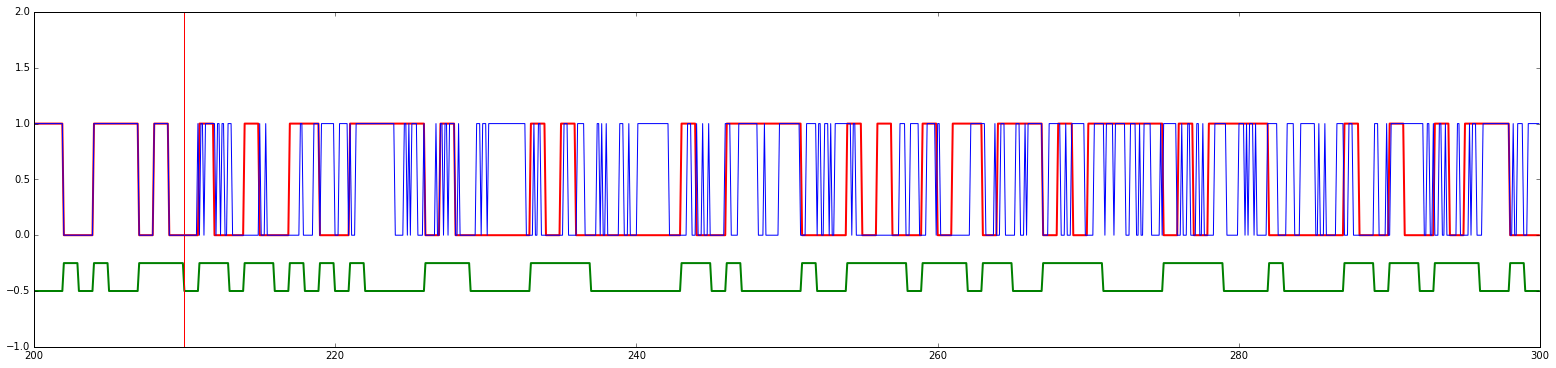

In [575]:
plt.figure(figsize=(27, 6))


plt.plot(time, target, 'r', linewidth=2)

for i, input_data in enumerate(inputs):
    shift_input_data = input_data / 4. - 0.5 - 0.3*i
    plt.plot(time, shift_input_data, 'g', linewidth=2)
    
plt.axvline(x=settings["init_time"], color='red')
plt.axvline(x=settings["training_time"], color='red')

plt.plot(time, (output>0.5).astype(int), 'b',  linewidth=1)
plt.xlim(200)
plt.ylim(-1, 2)

#mpld3.display()
plt.show()

In [576]:
idx = len(time) - len(time[time>=settings["training_time"]])
th_list = []
ac_list = []
for th in np.arange(0., 1.0, 0.01):
    a = output[idx:]
    a = (a>th).astype(int)
    b = target[idx:].astype(int)
    res = b == a
    ac = float(float(len(res[res])) / float(len(a)))
    th_list.append(th)
    ac_list.append(ac)


In [577]:
i = len(ac_list)/2
print th_list[i]
print ac_list[i]

0.5
0.525555555556


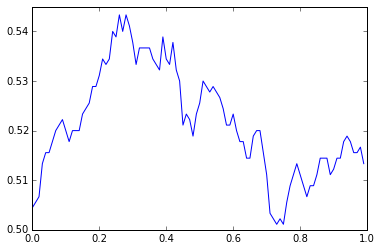

In [578]:
plt.plot(th_list, ac_list)
plt.show()

In [535]:
for i in range(len(ac_list)):
    if ac_list[i-1] < ac_list[i] and ac_list[i] > ac_list[i+1]:
        print "%f: %f" % (th_list[i], ac_list[i])

0.520000: 0.932667
0.550000: 0.934333


In [474]:
def extract_cwnd(filename, N):
    data = np.loadtxt( filename, usecols=(1,3,7,17) ) #(time, src, dst, cwnd)
    cwnd = [[np.empty((0,2)) for i in range(N)] for j in range(N)]
    for d in data:
        src = int(d[1])
        dst = int(d[2])
        if src == dst or not(0<=src<N) or not(0<=dst<N):
            continue
        cwnd[src][dst] = np.vstack((cwnd[src][dst], (d[0], d[3])))
    return cwnd
"""
def plot_all_cwnd(cwnd_data):
    N = len(cwnd_data)
    for src in range(N):
        plt.figure(figsize=(15, 2))
        for dst in range(N):
            if src == dst:
                continue
            target = cwnd_data[src][dst]
            plt.plot(target[:,0], target[:,1], label=("node[%d] -> node[%d]"%(src, dst)))
        plt.ylim(1,40)
        #plt.xlim(0,10)
        #plt.legend()
        plt.show()
"""
def plot_all_cwnd(cwnd_data, N):
    plt.figure(figsize=(15, 2))
    for d in cwnd_data:
        #plt.figure(figsize=(15, 2))
        plt.plot(time, d)
        plt.ylim(0.,1.)
        #plt.xlim(0,10)
        #plt.legend()
    plt.show()

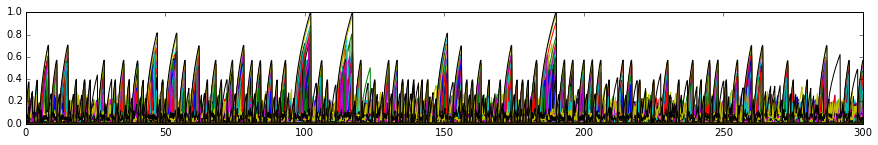

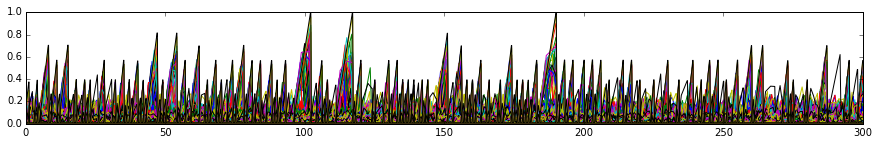

In [376]:
#cwnd = extract_cwnd(data_dir+"out.tcp", 10)
plot_all_cwnd(cwnd, settings["N"])
plot_all_cwnd(cwnd_peak, settings["N"])

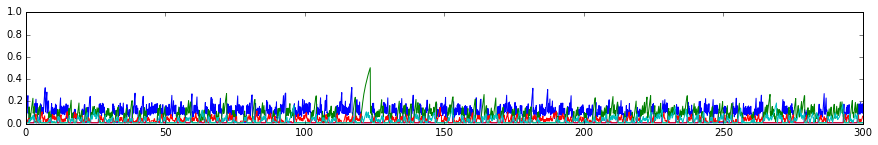

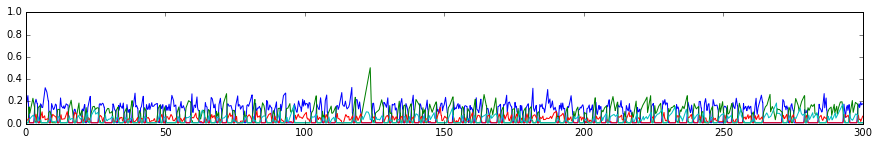

In [377]:
plot_all_cwnd(cwnd[0:4], settings["N"])
plot_all_cwnd(cwnd_peak[0:4], settings["N"])

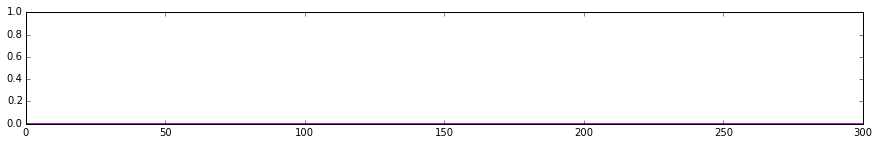

In [378]:
plot_all_cwnd(cwnd[360:365], settings["N"])